### Breast Cancer Diagnosis Prediction (Beginner Machine Learning Project)

This project uses the Breast Cancer Wisconsin dataset to predict whether a tumor is benign or malignant.  
After preprocessing and feature selection, I trained three models (Logistic Regression, Random Forest, and XGBoost) and compared their performance using accuracy, precision, recall, and F1-score.


In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')

### Install notes
Run this cell only if you see ModuleNotFoundError.
If needed, uncomment and run:
!pip install missingno xgboost


In [50]:
df = pd.read_csv("breast_cancer.csv")

In [51]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Step 3: Dataset Overview

Before doing anything with machine learning, I first want to see what my dataset looks like.
This helps me know what kind of data I have, how many columns there are, what their types are, and if there are any missing values.

In [52]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Observation

Rows: 569, Columns: 32.

Most columns are numeric.

diagnosis is text (M/B), so I’ll convert it later.

No obvious missing values here (I’ll double-check next).

### Step 4: Descriptive Statistics
Next, we'll examine the descriptive statistics of numeric features using `df.describe()`.  
This gives insights into the range, mean, standard deviation, and distribution of numeric values for each feature.


In [53]:
df.describe()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Observation:
- We can see the **mean**, **min**, and **max** values for each feature.  
- Features like `radius_mean`, `texture_mean`, and `area_mean` show different scales — scaling might be needed later for some algorithms.  
- No unexpected extreme outliers are visible from this summary.


### Step 5: Missing Value Analysis
Before moving forward, we must check whether our dataset contains any missing or null values.  
We'll first check numerically and then visualize missing data to ensure our dataset is clean.


In [54]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<Axes: >

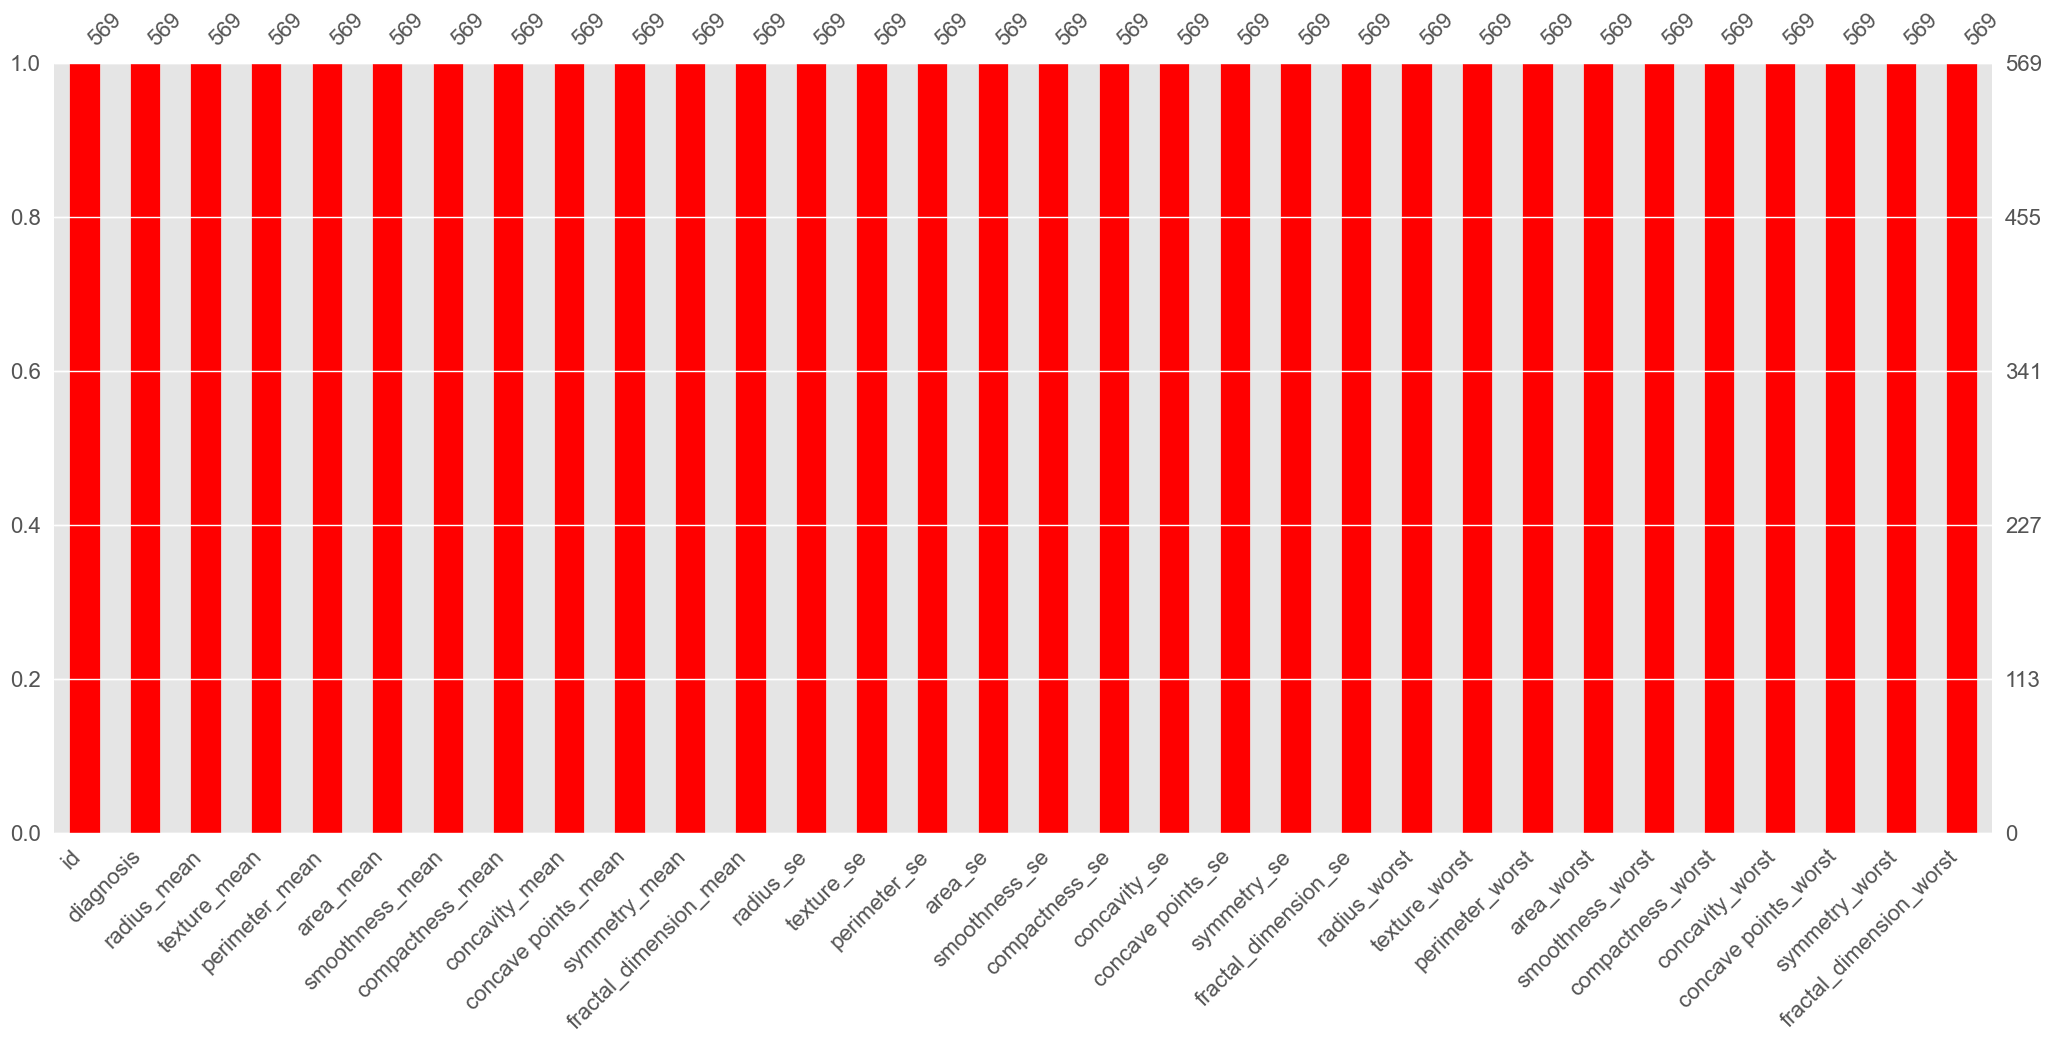

In [32]:
msno.bar(df, color="red")


###  Observation:
- The dataset does not contain any missing values, which means no imputation or cleaning is needed.  
- If there were missing values, we would consider handling them using mean/median (for numeric) or mode (for categorical) imputation.


### Step 6: Encode Target Column
The target column `diagnosis` currently contains categorical values 'M' (Malignant) and 'B' (Benign).  
We’ll convert them into numeric values:  
- **M → 1 (Malignant)**  
- **B → 0 (Benign)**  
This step prepares our target variable for machine learning algorithms.


In [55]:
target_col = "diagnosis"
df[target_col] = df[target_col].map({'M': 1, 'B': 0})
df[target_col].value_counts()


diagnosis
0    357
1    212
Name: count, dtype: int64

### Step 7: Visualize the Target Variable (Diagnosis)

The `diagnosis` column indicates whether the tumor is **Malignant (M)** or **Benign (B)**.  
Visualizing its distribution helps us understand how balanced the dataset is — whether there are more malignant or benign cases.


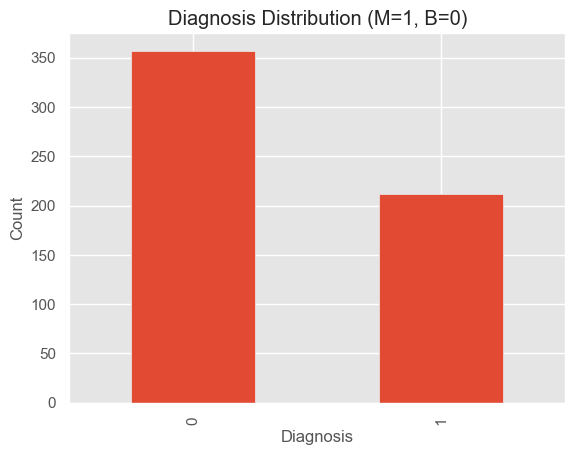

In [56]:
df['diagnosis'].value_counts().plot(kind='bar')
plt.title("Diagnosis Distribution (M=1, B=0)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()


### Step 8.  Exploratory Data Analysis (EDA)

Now that the data cleaning and preprocessing steps are done,  
I will begin exploring the dataset to understand patterns, relationships, and and relationships between features..  
This step includes:
- 5.1 Univariate Analysis  
- 5.2 Bivariate / Multivariate Analysis  
- 5.3 Correlation Heatmap


### Step 8.1:  Univariate Analysis

Here I check how each numeric column is spread out.  
This helps me see if the values are balanced, skewed, or have outliers.


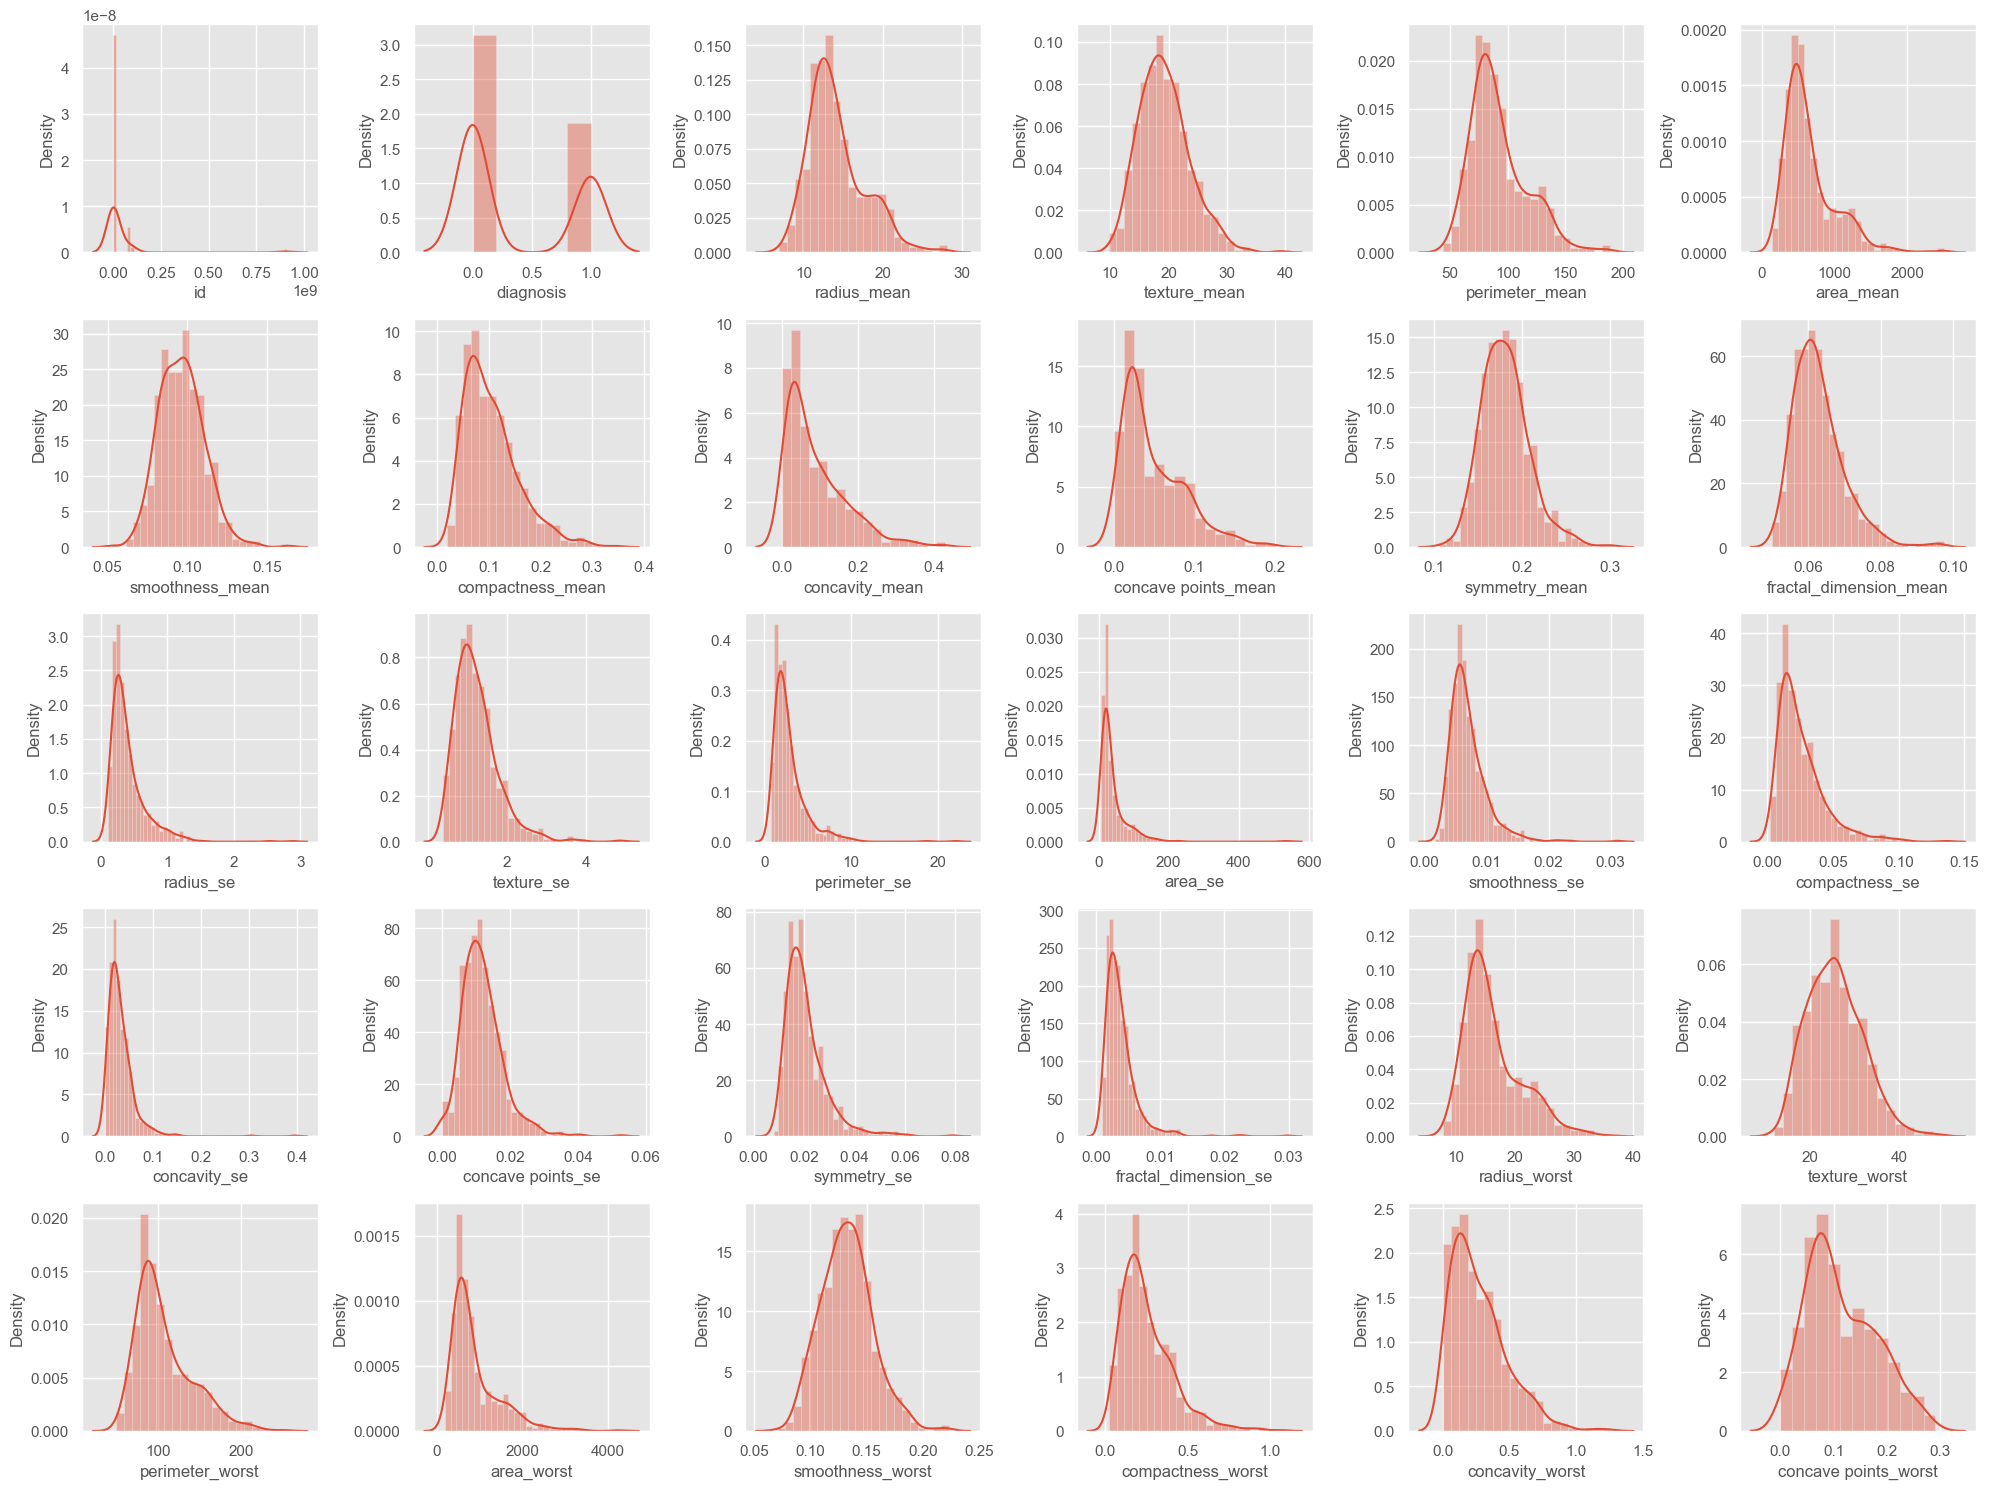

In [60]:
# each 5 row its having 6 columns
# density graph

plt.figure(figsize=(20,15))
plotnumber=1
for column in df:
    if plotnumber<=30:
        ax = plt.subplot(5,6, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber+=1

plt.tight_layout()
plt.show()

### Drop columns that are not needed

The id column is just an identifier. It doesn’t describe the tumor, so it doesn’t help with prediction. I removed it to keep only the features that the model can actually learn from.

In [61]:
df.drop(columns=["id"], inplace=True, errors="ignore")


### Check  to confirm removal

In [62]:
"id" in df.columns


False

### 8.2 Bivariate Analysis (Box Plots)

Before jumping into modeling, I wanted to quickly check how some important numeric features behave for the two classes in the dataset (benign = 0, malignant = 1). 
Instead of plotting all the features, I picked two that usually show a clear difference between the classes: **radius_mean** and **area_mean**.

These plots help me see if the values are generally higher or lower for malignant tumors compared to benign ones.


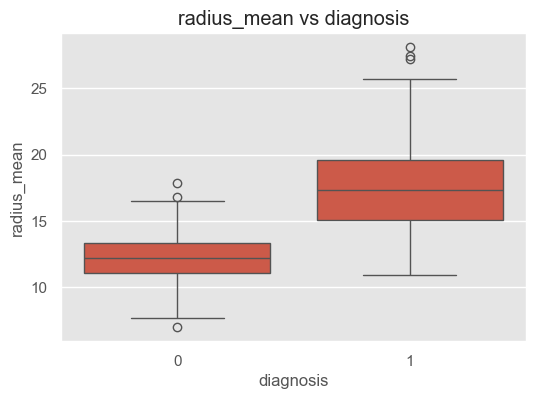

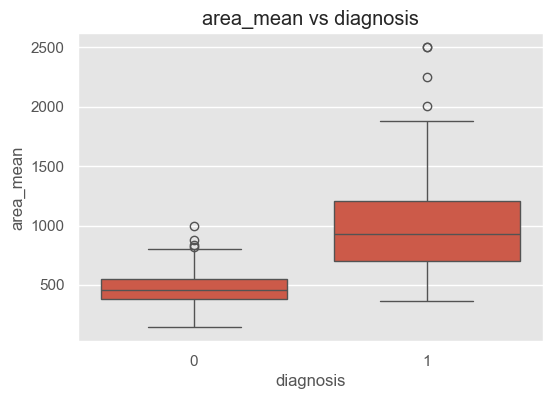

In [63]:
target_col = "diagnosis"

# BEST feature 1
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x=target_col, y="radius_mean")
plt.title("radius_mean vs diagnosis")
plt.show()

# BEST feature 2
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x=target_col, y="area_mean")
plt.title("area_mean vs diagnosis")
plt.show()


### Observations

- For **radius_mean**, I noticed that the malignant class (1) generally has higher radius values compared to the benign class (0). The boxplot shows a clear upward shift in the median.

- For **area_mean**, the malignant tumors also show larger area values. The difference between the two classes is quite visible here too.

Overall, these two features already give a hint that tumor size-related measurements may help the model learn the difference between the two classes.


## Prepare Features (X) and Target (y)

Now we separate the dataset into:
- **X (features):** all input columns used for prediction
- **y (target):** the column we want to predict (`diagnosis`)

Important: We **exclude the target column from X** so that correlation analysis and feature selection are done only on input features (this avoids leakage and keeps analysis correct).

In [64]:
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]


### 8.3 Correlation Heatmap

Finally, I check how strongly numeric features are related to one another.  
This helps find pairs that share similar information.


In [41]:
corr = X.corr()


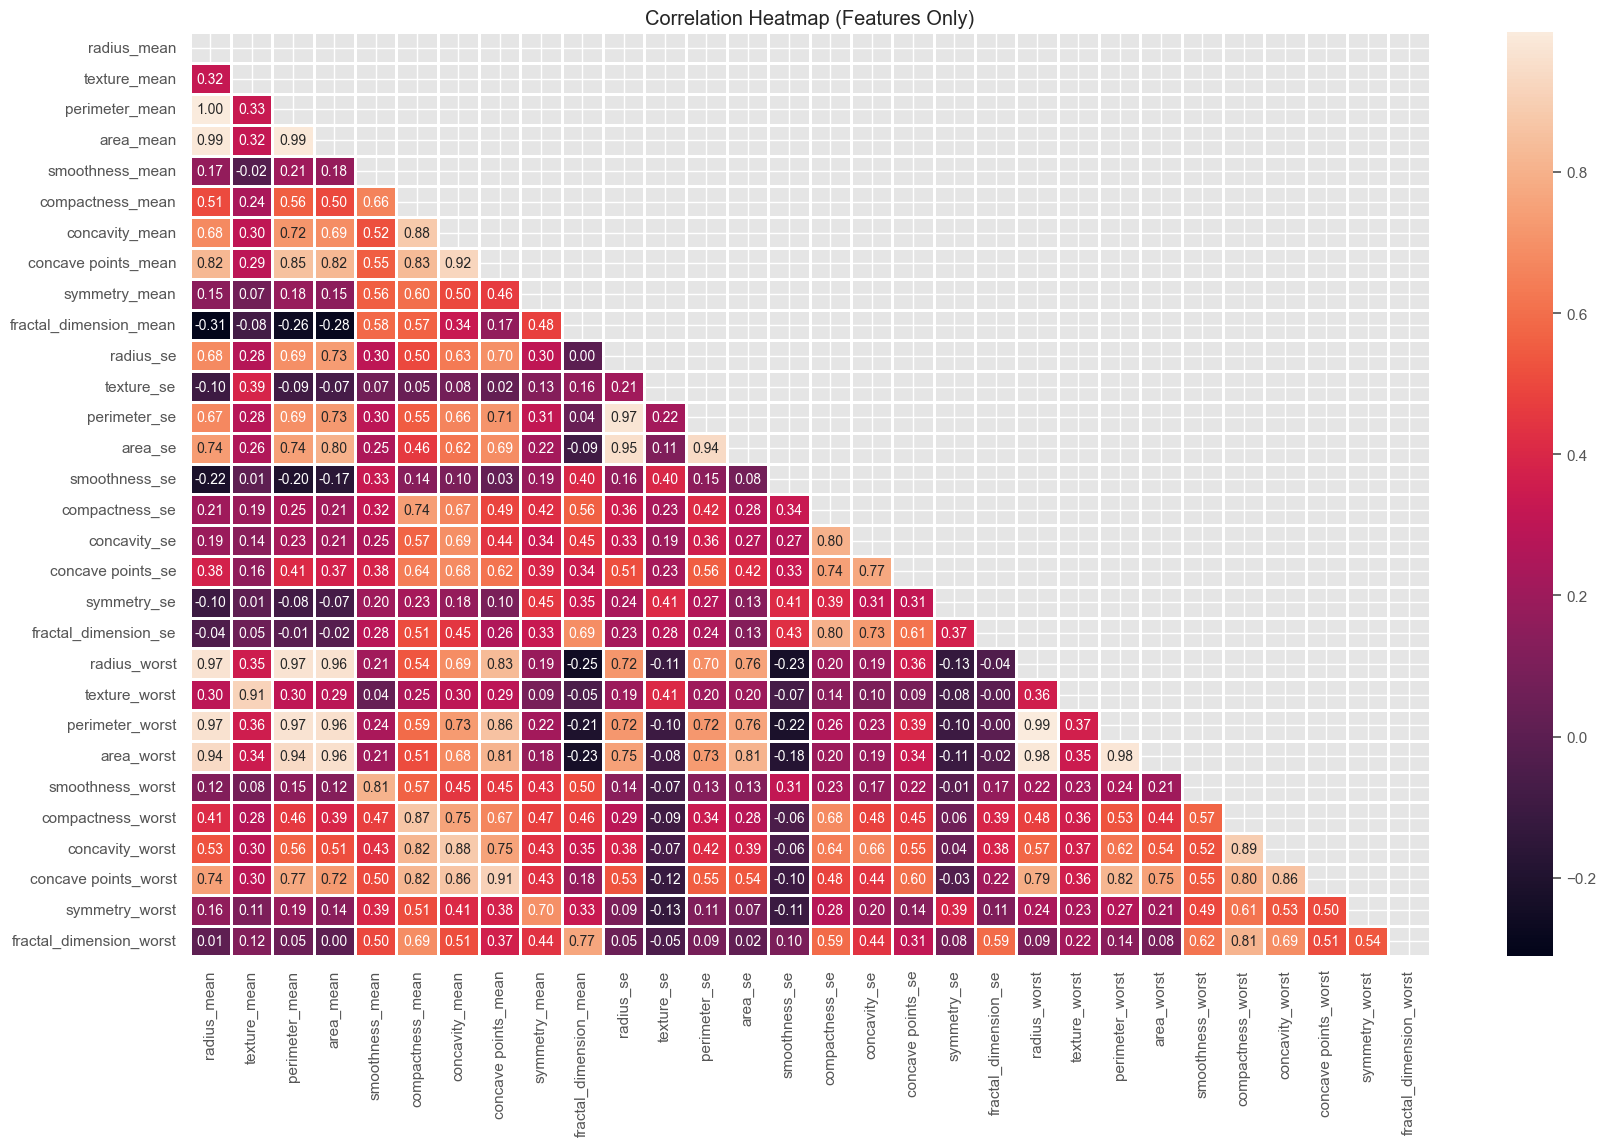

In [42]:
# heatmap (features only)
plt.figure(figsize=(20,12))
corr = X.corr()   # ✅ change from df.corr() to X.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, linewidths=1, annot=True, fmt=".2f")
plt.title("Correlation Heatmap (Features Only)")
plt.show()


### Observation:
Some feature pairs show strong correlation, indicating they capture similar information.
To avoid redundancy, correlated features can be removed or retained depending on the model.
For this project, we will keep all features for now and allow the models to determine
which features are most useful.


### Step 9:Feature Selection (Dropping Highly Correlated Features)

Some features in the dataset were extremely similar to each other based on the correlation values. 
To avoid repeating the same information in the model, I dropped the features that had a correlation 
higher than 0.92 with another feature.


In [66]:
corr_threshold = 0.92

corr = X.corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

to_drop = [col for col in upper.columns if (upper[col] > corr_threshold).any()]
print("Highly correlated columns to drop:", to_drop)

X = X.drop(columns=to_drop)
print("X shape after dropping correlated columns:", X.shape)

Highly correlated columns to drop: ['perimeter_mean', 'area_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst']
X shape after dropping correlated columns: (569, 22)


### Observations

- A few features were strongly correlated and did not add new information.
- I dropped those columns to keep the dataset clean and reduce duplicate patterns.
- This helps the model train better and reduces multicollinearity.


In [68]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 32 feature reduce it 23 now

## Step 10. Model Training and Evaluation
Now that preprocessing and feature selection are done, I will split the data, scale the features, train three models, and check their performance.


### **Observation:**  
The shapes confirm that X contains all selected features and y contains the diagnosis labels.  



### 10.2 Train–test split
I split the data into training and test sets to evaluate the model on unseen data.


In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test =train_test_split(X,y, test_size=0.2, random_state=42,stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 22), (114, 22), (455,), (114,))

**Observation:** 80% data is for training and 20% for testing.


### 10.3 Feature scaling # scaling data (StandardScaler)
The numeric features have different ranges,  I use StandardScaler so all features have a similar scale.

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [71]:
# scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)                        

In [72]:
X_train.shape

(455, 22)

### Logistic Regression – Model Training

I use Logistic Regression as a simple baseline model on the scaled features.

In [74]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### Logistic Regression – Evaluation

I check accuracy, precision, recall and F1-score on the test set.

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_lr = lr_model.predict(X_test_scaled)

lr_accuracy  = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall    = recall_score(y_test, y_pred_lr)
lr_f1        = f1_score(y_test, y_pred_lr)

print("Accuracy :", lr_accuracy)
print("Precision:", lr_precision)
print("Recall   :", lr_recall)
print("F1-score :", lr_f1)

Accuracy : 0.956140350877193
Precision: 0.9512195121951219
Recall   : 0.9285714285714286
F1-score : 0.9397590361445783


**Observation:**  
Logistic Regression provides a simple baseline and helps me compare the tree-based models.

### Random Forest – Model Training

Random Forest combines many decision trees and is often strong on tabular medical data.

In [76]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=8,
    min_samples_leaf=2,
    random_state=42
)

rf_model.fit(X_train, y_train)

,n_estimators,150
,criterion,'gini'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Random Forest – Evaluation

I use the same metrics to compare Random Forest with Logistic Regression.

In [77]:
y_pred_rf = rf_model.predict(X_test_scaled)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

print("Accuracy :", rf_accuracy)
print("Precision:", rf_precision)
print("Recall   :", rf_recall)
print("F1-score :", rf_f1)


Accuracy : 0.7368421052631579
Precision: 1.0
Recall   : 0.2857142857142857
F1-score : 0.4444444444444444


### **Observation:**  
With limited tree depth and at least two samples per leaf, the Random Forest model performs well without clearly overfitting.

### XGBoost – Model Training and Evaluation

XGBoost builds many small trees one after another, and each new tree focuses on correcting some of the previous errors.

In [78]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    random_state=42,
    eval_metric='logloss'
)

xgb_model.fit(X_train_scaled, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_xgb = xgb_model.predict(X_test_scaled)

xgb_accuracy  = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall    = recall_score(y_test, y_pred_xgb)
xgb_f1        = f1_score(y_test, y_pred_xgb)

print("XGB Accuracy :", xgb_accuracy)
print("XGB Precision:", xgb_precision)
print("XGB Recall   :", xgb_recall)
print("XGB F1-score :", xgb_f1)

XGB Accuracy : 0.9385964912280702
XGB Precision: 0.9487179487179487
XGB Recall   : 0.8809523809523809
XGB F1-score : 0.9135802469135802


### **Observation:** XGBoost handles complex patterns and often performs very well.


### **Compare All Models**

### Model Performance Table

I collect the main test metrics for the three models in one table.

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


results = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [lr_accuracy, rf_accuracy, xgb_accuracy],
    "Precision": [lr_precision, rf_precision, xgb_precision],
    "Recall": [lr_recall, rf_recall, xgb_recall],
    "F1-score": [lr_f1, rf_f1, xgb_f1]
}

results_df = pd.DataFrame(results)
results_df


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.956140,0.951220,0.928571,0.939759
1,Random Forest,0.736842,1.000000,0.285714,0.444444
2,XGBoost,0.938596,0.948718,0.880952,0.913580


**Observation:**  
The table makes it easy to compare the models and see which one balances accuracy and F1-score best.

### Model Performance Comparison Plot

To finish, I plot Accuracy and F1-score for all three models.

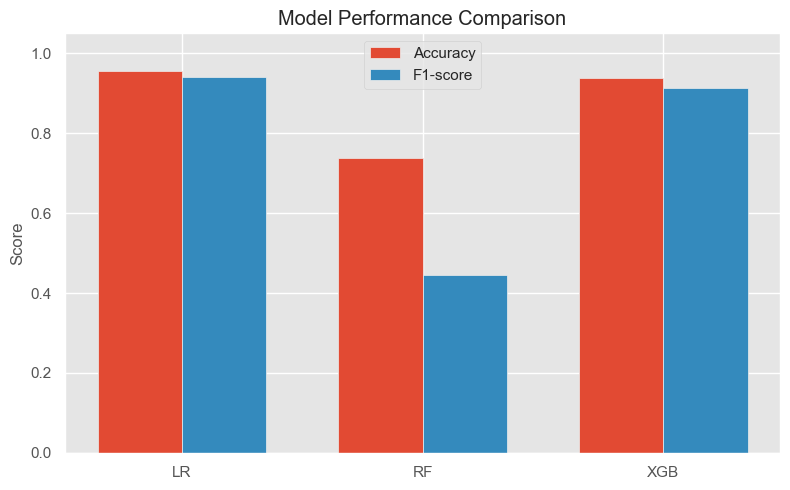

In [81]:
import numpy as np
import matplotlib.pyplot as plt

models = ['LR', 'RF', 'XGB']
accuracy_scores = [lr_accuracy, rf_accuracy, xgb_accuracy]
f1_scores       = [lr_f1, rf_f1, xgb_f1]

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(8, 5))

plt.bar(x - width/2, accuracy_scores, width, label='Accuracy')
plt.bar(x + width/2, f1_scores,       width, label='F1-score')

plt.xticks(x, models)
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.title('Model Performance Comparison')
plt.legend()
plt.tight_layout()
plt.show()


**Observation:**  
All three models perform well on this dataset, with XGBoost giving the best overall scores and Random Forest close behind.

### Conclusion

In this project, I built and compared three models (Logistic Regression, Random Forest, and XGBoost) to predict breast cancer from tabular data.  
Logistic Regression gave a solid baseline, Random Forest improved the performance using tree ensembles, and XGBoost achieved the best overall scores on the test set.  
In future work, I would tune the hyperparameters more systematically ( with GridSearchCV) and test the models on larger or more diverse datasets.
